In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
from geopy.distance import great_circle
from sklearn.linear_model import Lasso


In [2]:
listing_df = pd.read_csv('listings.csv')

In [162]:
crime_df = pd.read_csv('SA_crime_ward.csv')

In [165]:
crime_df.head()

,geo_level,geo_code,0_14,15_24,25_34,35_44,45_54,55_64,65+,total_raw,total_10000 _rounded
0,ward,1.0,33.0,249.0,504.0,276.0,153.0,63.0,39.0,1317.0,188.0
1,ward,2.0,27.0,249.0,408.0,282.0,174.0,69.0,39.0,1248.0,178.0
2,ward,3.0,33.0,243.0,417.0,258.0,132.0,57.0,51.0,1191.0,170.0
3,ward,4.0,39.0,306.0,447.0,309.0,180.0,132.0,90.0,1503.0,215.0
4,ward,5.0,33.0,90.0,282.0,132.0,126.0,72.0,60.0,795.0,114.0


In [5]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,819,3,54,2020-03-07,0.63,1,362
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2050,2,27,2019-08-18,0.34,4,251
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2804,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,1620,5,5,2016-12-10,0.06,5,208
4,15180,The Melkbaai - Beachfront,59663,Heinri,NaN,Ward 83,-34.11124,18.82349,Entire home/apt,575,2,0,NaN,NaN,1,365


In [168]:
crime_df.drop(111, inplace = True)

In [169]:
crime_df['geo_code'].astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
106    107
107    108
108    109
109    110
110    111
Name: geo_code, Length: 111, dtype: int64

In [178]:
listing_df = listing_df.merge(crime_df, left_on='neighbourhood', right_on = 'geo_code' ,how='left')
listing_df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,geo_code_y,0_14_y,15_24_y,25_34_y,35_44_y,45_54_y,55_64_y,65+_y,total_raw_y,total_10000 _rounded_y
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,57,-33.94739,18.47600,819,3,...,57.0,24.0,219.0,456.0,432.0,303.0,141.0,120.0,1695.0,242.0
1,15007,Blaauwberg House,59072,Dirk,NaN,23,-33.80001,18.46063,2050,2,...,23.0,39.0,270.0,357.0,210.0,153.0,42.0,30.0,1101.0,157.0
2,15077,Top relaxed beach living in style,59342,Georg,NaN,4,-33.85812,18.49043,1620,5,...,4.0,39.0,306.0,447.0,309.0,180.0,132.0,90.0,1503.0,215.0
3,15199,Self catering apartment,59694,Alexa,NaN,115,-33.91044,18.41239,124995,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,71,-34.03863,18.43128,1202,2,...,71.0,39.0,273.0,405.0,246.0,132.0,126.0,18.0,1239.0,177.0
5,15331,Mountview Accommodation,60058,Francis,NaN,60,-33.97069,18.49697,714,2,...,60.0,45.0,228.0,336.0,234.0,99.0,87.0,45.0,1074.0,153.0
6,15480,In hip designer district of Cape T.,60443,Jean,NaN,115,-33.92876,18.42247,705,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15704,Hollywood Mansion & Spa Camps Bay with Butler,61441,Kevin,NaN,54,-33.96462,18.37595,17902,4,...,54.0,36.0,294.0,282.0,276.0,207.0,132.0,48.0,1275.0,182.0
8,16259,Chambery - luxury self catering,63255,Cheryl,NaN,59,-33.99463,18.46505,1256,2,...,59.0,33.0,150.0,324.0,258.0,207.0,87.0,15.0,1074.0,153.0
9,17270,VILLA CARRARA W SELF-CATERING-VIEWS renovated May,66986,Henri,NaN,115,-33.91073,18.40866,1304,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
listing_df[listing_df['neighbourhood'] == 116]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,geo_code_y,0_14_y,15_24_y,25_34_y,35_44_y,45_54_y,55_64_y,65+_y,total_raw_y,total_10000 _rounded_y
5411,15661476,Cosy corner,87746061,Bukelwa,NaN,116,-34.01487,18.62190,542,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7936,20924227,Empolweni homestay,150405626,Thandiwe,NaN,116,-34.01891,18.62449,457,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14750,38260275,Local & comfortable!,290760697,Noluthando,NaN,116,-34.02080,18.62710,949,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
listing_df.drop(4957, inplace = True)

In [190]:
listing_df[listing_df['minimum_nights'] == 1125]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,geo_code_y,0_14_y,15_24_y,25_34_y,35_44_y,45_54_y,55_64_y,65+_y,total_raw_y,total_10000 _rounded_y


In [ ]:
# Ward 112 impute mean from surounding wards (Ward 103, Ward 21, Ward 70 = 175)
# Ward 113  impute mean from surounding wards (Ward 107, Ward 1, Ward 4 = 237)
# Ward 115  impute mean from surounding wards (Ward 54, Ward 57, Ward 77, Ward 55 = 266)
# Ward 116  impute mean from surounding wards (Ward 87, Ward 18, Ward 35, Ward 76, Ward 92, Ward 79, Ward 78 = 265)

In [ ]:
listing_df['total_10000_rounded_y'] = listing_df['total_10000_rounded_y'].apply[lambda x: x]

In [6]:
pd.set_option('display.max_columns', 20)

In [7]:
listing_df[listing_df.price > 3000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.91044,18.41239,Entire home/apt,124995,14,2,2016-04-15,0.03,1,364
11,15704,Hollywood Mansion & Spa Camps Bay with Butler,61441,Kevin,NaN,Ward 54,-33.96462,18.37595,Entire home/apt,17902,4,1,2017-11-14,0.03,7,306
17,19398,Apartments on the Beach,73779,Roger,NaN,Ward 23,-33.73046,18.43966,Entire home/apt,5712,5,0,NaN,NaN,1,365
18,19561,Apartment in Durbanville,74188,Cherry,NaN,Ward 103,-33.84192,18.67661,Private room,3389,2,0,NaN,NaN,1,365
20,19811,MARINA VIEWS,74863,Nigel,NaN,Ward 64,-34.08428,18.47585,Entire home/apt,4694,14,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,43359713,*Special Rate* An Intimate space for lockdown,325262590,Chad,NaN,Ward 74,-34.01306,18.34072,Entire home/apt,4493,3,0,NaN,NaN,2,362
24035,43361480,Brand New Ocean View Villa - 4 bed w Pool & Ga...,12942450,Rich,NaN,Ward 74,-34.03907,18.36526,Entire home/apt,8997,3,0,NaN,NaN,1,248
24040,43385762,Villa Roku. Cape architectural masterpiece.,345670077,Nico,NaN,Ward 54,-33.96599,18.38153,Entire home/apt,13086,2,0,NaN,NaN,1,365
24065,43484784,Ultimate designer home / work / film location!,19745781,Nicholas Sadleir,NaN,Ward 54,-33.92016,18.38954,Entire home/apt,4000,2,1,2020-05-25,1.00,5,90


In [8]:
listing_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [9]:
listing_df.shape

(24079, 16)

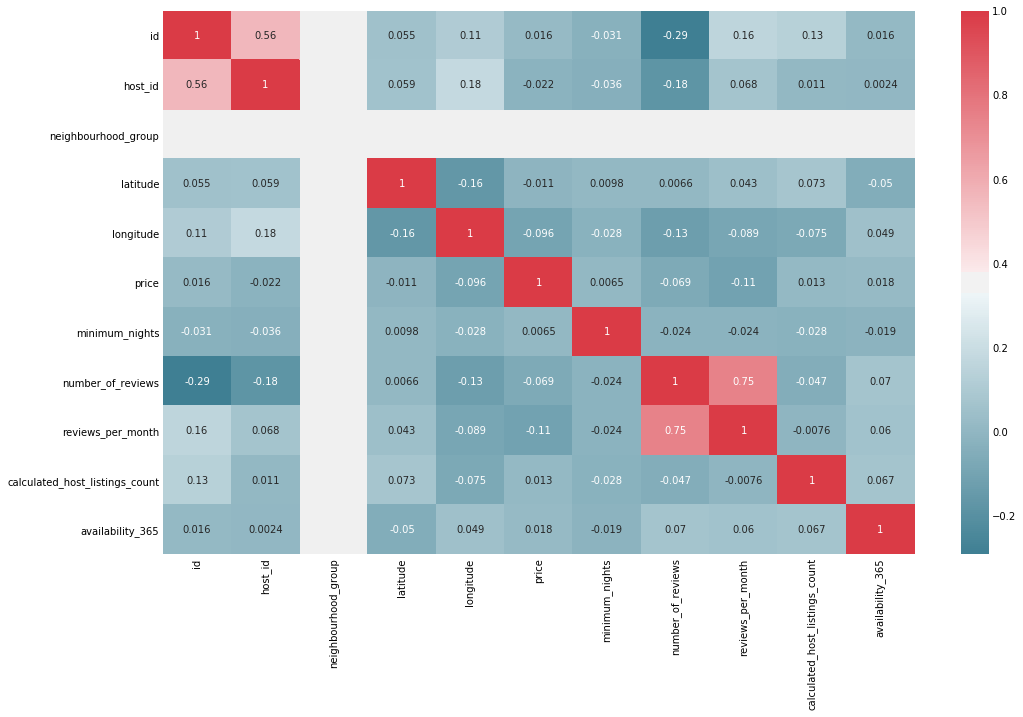

In [9]:
# Baseline Correlation heatmap 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(listing_df)

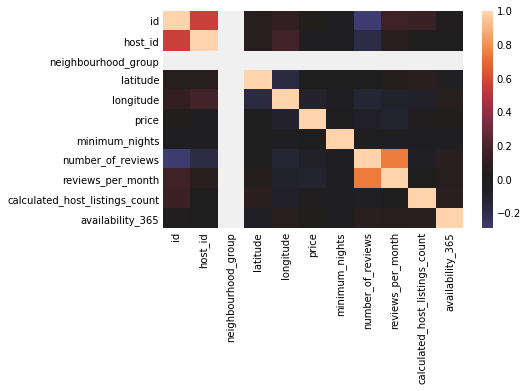

In [10]:
import seaborn as sns
sns.heatmap(listing_df.corr(), center=0);

In [11]:
#Dealing with NAs 
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               24079
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6823
reviews_per_month                  6823
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#because the data set is over 24k, I decided to drop the nan values of reviews and last review (the same rows were nan for each)
listing_df.dropna(subset = ['reviews_per_month', 'last_review'], axis = 0, inplace = True)


In [13]:
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               17256
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
listing_df.shape

(17256, 16)

In [15]:
#for neighbourhood_group I plan to imput values based on the Wards, grouping them by where in Capetown they are


In [16]:
#Air BNB zar conversion rate is 14.3 (current rate is 16.5)
listing_df['price_usd'] = listing_df.price.apply(lambda x: x/14.23 if x>= 3000 else x)

In [17]:

listing_df[listing_df.price_usd == 0.0]

#closed listing does not exist 9775 is 20685098
listing_df.drop(9775, inplace = True)


In [18]:
#listing append 9808 is 20736711 price is 121 USD, minimum night 7
listing_df.at[9808, 'price_usd'] = 121
listing_df.at[9808, 'minimum_nights'] = 7

In [19]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_usd'],
      dtype='object')

In [20]:
listing_df = pd.get_dummies(listing_df, columns=['room_type'])

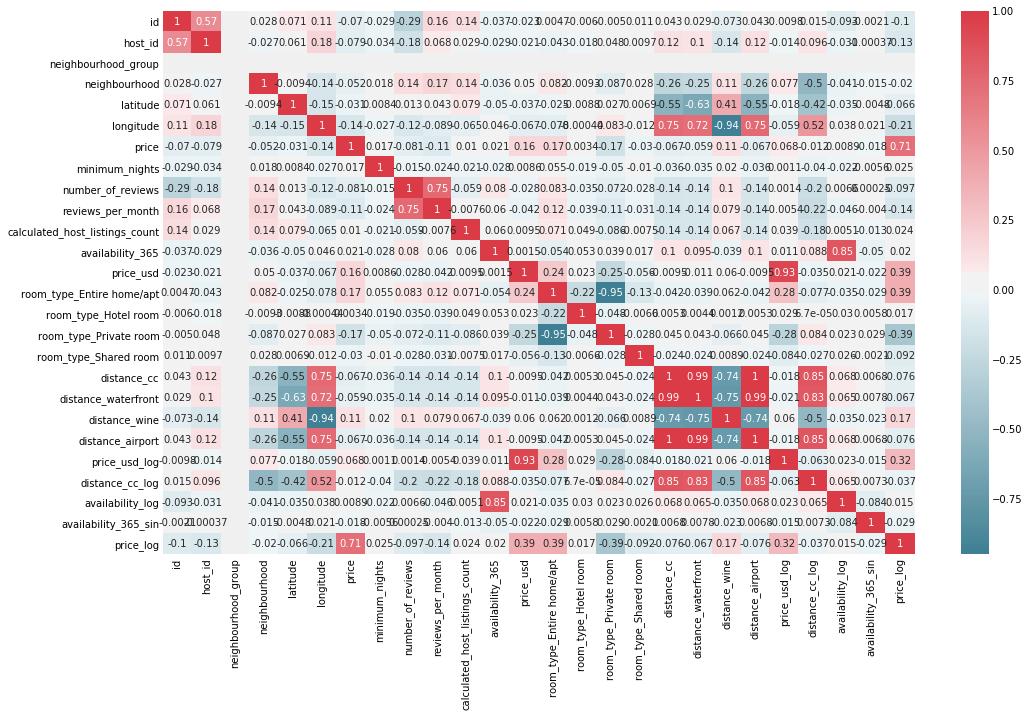

In [87]:
correlation_heatmap(listing_df)

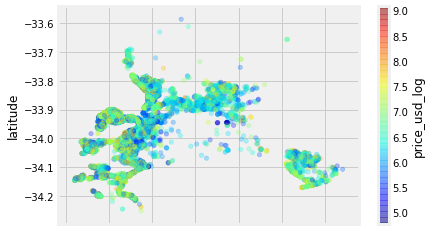

In [88]:
listing_df.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd_log', cmap = plt.get_cmap('jet'))

In [ ]:
listing_df[listing_df['price_usd_log'].lt(6)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd_log', cmap = plt.get_cmap('jet'))

In [ ]:
listing_df[listing_df['price_usd'].lt(2000)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd', cmap = plt.get_cmap('jet'))

In [23]:
listing_df.neighbourhood = listing_df.neighbourhood.map(lambda x: x.replace('Ward', ''))

In [24]:
listing_df.neighbourhood = listing_df.neighbourhood.astype(int)

In [25]:
listing_df.neighbourhood

0         57
1         23
3          4
5        115
6         71
        ... 
23836    115
23849      2
23852     54
23992      5
24065     54
Name: neighbourhood, Length: 17255, dtype: int64

In [27]:
#city center wards df['city_center'] = wards == 77,54,115
#listing_df['neighbourhood_group'] = listing_df['neighbourhood_group'].map(lambda x: if x == 74]
                                                                          
#[74, 77, 54, 57, 59, 58, 60, 47, 46, 48, 49, 52, 51, 53, 56, 50, 31, 40, 41, 42, 44, 45]
#Metro_North = [4, 5, 1, 27, 26, 30, 28]
#Metro_South = [69, 71, 62, 73, 72, 63, 66, 65, 67, 80, 33, 38, 34, 37, 43] 





In [28]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [29]:
#distance from city center
# 33.9249° S, 18.4241° E cape town city center


In [30]:
# city center -33.9249, 18.4241
# VA Water Front -33.9036, 18.4205
# Wine Lands -34.075691, 18.843266
# Airport -33.9715, 18.6021


from geopy.distance import great_circle
city_center = (-33.9249,18.4241)
listing_df['distance_cc'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(city_center, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)



In [31]:
va_water = (-33.9036, 18.4205)
listing_df['distance_waterfront'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(va_water, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [32]:
wine_lands = (-34.075691, 18.843266)
listing_df['distance_wine'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(wine_lands, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [33]:
airport = (-33.9249,18.4241)
listing_df['distance_airport'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(airport, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [34]:
listing_df['distance_cc']

0         3.356482
1         8.879955
3         5.980151
5         1.203734
6         7.868755
           ...    
23836     0.506106
23849    11.165350
23852     2.326342
23992     7.933913
24065     2.008320
Name: distance_cc, Length: 17255, dtype: float64

In [35]:
listing_df['minimum_nights'].unique()

array([   3,    2,    5,   14,    4,    7,    1,    6,   30,   90,  360,
         10,   45,    8,   20,   21,   28,   42,   12,   31,  240,  180,
         15,   60,   11,  365,    9,  120,   13,  210,  356,   25,  100,
         32,   18,   24, 1125,   93,  168,  186,   27,  150,   89,   29,
        300,   94,   22,   33,  183])

In [36]:
#drop or not to drop that is the question
listing_df[listing_df['minimum_nights'] == 1125]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,availability_365,price_usd,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_waterfront,distance_wine,distance_airport
6194,14937323,"Pied a terre,views , chic central",63403205,Manuela,NaN,115,-33.91182,18.41313,1004,1125,...,0,1004.0,1,0,0,0,1.101073,0.707935,27.117279,1.101073


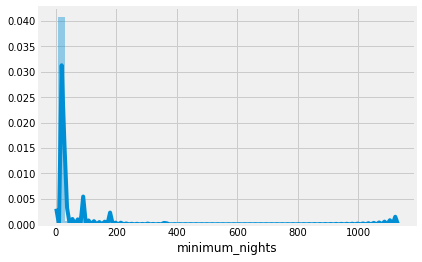

In [37]:
sns.distplot(listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'])

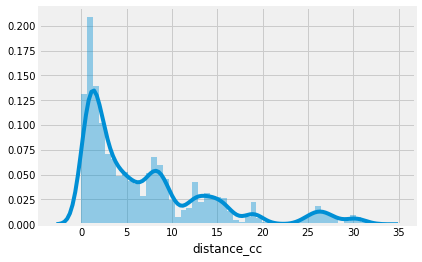

In [38]:
sns.distplot(listing_df['distance_cc'])

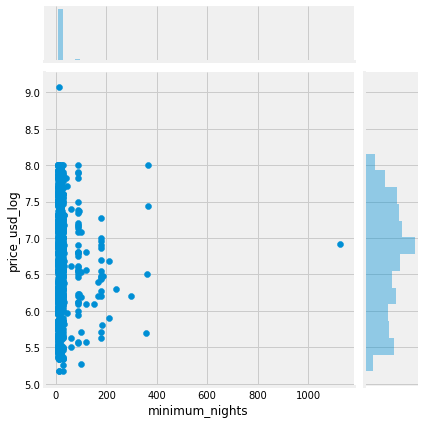

In [90]:
sns.jointplot(x = listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'],
               y = listing_df[listing_df['minimum_nights'] > 7]['price_usd_log'])

In [ ]:
# ANOVA
# room_type_Entire home/apt
# distance_cc

# price_usd

In [91]:
listing_df['minimum_nights'] = listing_df['minimum_nights'].astype(int)
listing_df['price_usd'] = listing_df['price_usd'].astype(int)

In [92]:
# minimum nights > 4
# min nights < 4 
# mean min_nights is 3.93
# Prices of Air BNBs with less than 4 minimum nights is statistically different than houses with minimum nights greater or equal to 4. 

#two sample t test not anova

x = listing_df[listing_df['minimum_nights'] >= 4]['price_usd_log']
y = listing_df[listing_df['minimum_nights'] < 4]['price_usd_log']
stats.f_oneway(x, y)


F_onewayResult(statistic=10.147950530772201, pvalue=0.001447188113075638)

In [93]:
# As we get closer the the City Center, the mean of the price changes. 
#WORK ON THIS ONE 

x = listing_df[listing_df['distance_cc'] >= 10]['price_usd_log']
y = listing_df[(listing_df['distance_cc'] > 8) & (listing_df['distance_cc'] < 10)]['price_usd_log']
z = 
ten_miles = stats.f_oneway(x, y, z)

x = listing_df[listing_df['distance_cc'] >= 8]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 8]['price_usd_log']
eight_miles = stats.f_oneway(x, y)

x = listing_df[listing_df['distance_cc'] >= 1]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 1]['price_usd_log']
one_mile = stats.f_oneway(x, y)

print('10 miles: ', ten_miles)
print('8 miles: ', eight_miles)
print('1 mile: ', one_mile)


10 miles:  F_onewayResult(statistic=3.5455725119650383, pvalue=0.05972136894810406)
8 miles:  F_onewayResult(statistic=10.517733169156823, pvalue=0.0011845917350957144)
1 mile:  F_onewayResult(statistic=91.65109186054573, pvalue=1.1702884463193969e-21)


In [43]:
stats.ttest_ind(listing_df[listing_df['distance_cc'] < 1]['price'], listing_df[listing_df['distance_cc'] >= 1]['price_usd']) 

Ttest_indResult(statistic=19.547126431068854, pvalue=3.548545008046792e-84)

In [44]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,availability_365,price_usd,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_waterfront,distance_wine,distance_airport
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,57,-33.94739,18.47600,819,3,...,362,819,1,0,0,0,3.356482,4.390745,22.826170,3.356482
1,15007,Blaauwberg House,59072,Dirk,NaN,23,-33.80001,18.46063,2050,2,...,251,2050,1,0,0,0,8.879955,7.518682,29.050059,8.879955
3,15077,Top relaxed beach living in style,59342,Georg,NaN,4,-33.85812,18.49043,1620,5,...,208,1620,0,0,1,0,5.980151,5.095566,25.194771,5.980151
5,15199,Self catering apartment,59694,Alexa,NaN,115,-33.91044,18.41239,124995,14,...,364,8783,1,0,0,0,1.203734,0.663044,27.195878,1.203734
6,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,71,-34.03863,18.43128,1202,2,...,303,1202,1,0,0,0,7.868755,9.350111,23.721691,7.868755


In [45]:
listing_df.price_usd.describe()

count    17255.000000
mean      1009.827992
std        669.618179
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [46]:
listing_df['price_usd_log'] = np.log(listing_df['price_usd'])

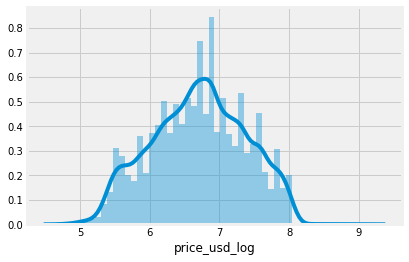

In [147]:
sns.distplot(listing_df['price_usd_log'])

In [48]:
listing_df['distance_cc_log'] = np.log(listing_df['distance_cc'])

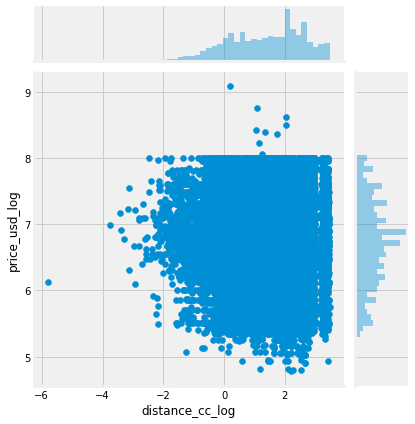

In [49]:
sns.jointplot(x = 'distance_cc_log', y = 'price_usd_log', data = listing_df);

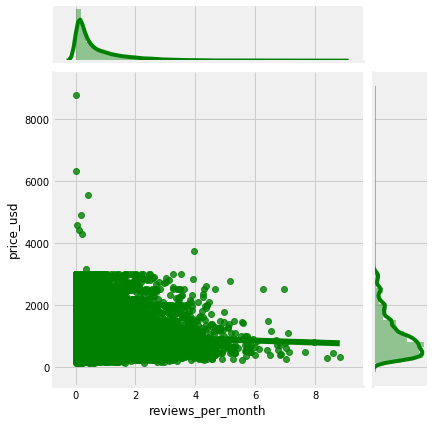

In [50]:
sns.jointplot(x = 'reviews_per_month', y = 'price_usd', data = listing_df, kind = 'reg', color = 'green');

In [51]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log'],
      dtype='object')

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


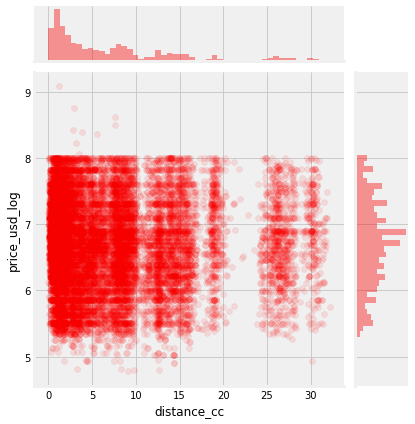

In [94]:
listing_df['availability_log'] = np.log(listing_df['availability_365'])
listing_df['availability_365_sin'] = np.sin(listing_df['availability_365'])
listing_df['price_log'] = np.log(listing_df['price'])
sns.jointplot(x = 'distance_cc', y = 'price_usd_log', data = listing_df, kind = 'scatter', color = 'red', alpha = 0.1);


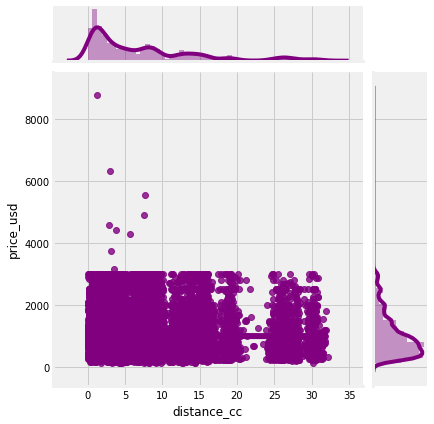

In [53]:
sns.jointplot(x = 'distance_cc', y = 'price_usd', data = listing_df, kind = 'reg', color = 'purple');

In [54]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [55]:
listing_df.price_usd.describe()

count    17255.000000
mean      1009.827992
std        669.618179
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [125]:
# baseline model: 693.3257724308925 r2:  -0.07212491057954762

subset = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', ]
x = listing_df[subset]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(y)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)


rmse:  693.3257724308925 r2:  -0.07212491057954762


In [57]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

693.3257724308925

In [58]:
#2nd baseline 
subset2 = ['neighbourhood', 'room_type_Entire home/apt']
x = listing_df[subset2]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "mean")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(x)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)

rmse:  669.5987754252504 r2:  0.0


In [59]:
641

641

In [60]:
# bin the availability

In [ ]:
#CORR CHECK 

In [61]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [62]:
corr_check = listing_df.corr()

In [173]:
corr_check['distance_wine'] 

# neighbourhood = no conflicts
# latitude = no conflicts
# longitude = over .7 with distance airport, cc, waterfront
# number of reviews = over .7 reviews_per_month 
# availability 365 = over .7 availability log 
# entire house no conflicts 
# distance cc conflicts with distance waterfront and longitude 
# distance airport -.7 with wine distance?

id                               -0.072523
host_id                          -0.135748
neighbourhood_group                    NaN
neighbourhood                     0.112128
latitude                          0.405521
longitude                        -0.935501
price                             0.110629
minimum_nights                    0.019570
number_of_reviews                 0.099594
reviews_per_month                 0.079497
calculated_host_listings_count    0.067443
availability_365                 -0.038580
price_usd                         0.060264
room_type_Entire home/apt         0.061946
room_type_Hotel room              0.001232
room_type_Private room           -0.065802
room_type_Shared room             0.008857
distance_cc                      -0.735827
distance_waterfront              -0.745928
distance_wine                     1.000000
distance_airport                 -0.735827
price_usd_log                     0.059606
distance_cc_log                  -0.495230
availabilit

In [174]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [142]:
subset3 = ['minimum_nights','number_of_reviews', 'neighbourhood', 'availability_365', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room','room_type_Shared room', 'distance_cc', 
           'distance_airport', 'distance_wine', 'distance_waterfront', 'latitude']


df_features = listing_df[subset3]
target = listing_df['price_usd_log']
len(subset3)

11

In [143]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias = False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
model2 = LinearRegression()

model2 = model2.fit(df_poly2, target)

In [144]:
model2 = sm.OLS(y, poly2_data).fit()
model2.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_usd_log   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     48.24
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:17:33   Log-Likelihood:                -16465.
No. Observations:               17255   AIC:                         3.303e+04
Df Residuals:                   17206   BIC:                         3.341e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4384      0.233      1.884      0.060      -0.018       0.895
x2            -0.2461      0.075     -3.294      0.001      -0.393      -0.100
x3            -0.1966      0.074     -2.647      0.008      -0.342      -0.051
x4            -0.0200      0.012     -1.675      0.094      -0.043       0.003
x5          2679.1223    396.745      6.753      0.000    1901.462    3456.782
x6          2686.0231    397.302      6.761      0.000    1907.271    3464.775
x7          2668.6135    396.810      6.725      0.000    1890.826    3446.401
x8          2683.2830    397.826      6.745      0.000    1903.503    3463.063
x9            -1.5990      0.234     -6.821      0.000      -2.058      -1.139
x10           -1.5989      0.234     -6.821      0.000      -2.058      -1.139
x11          250.2527     37.555      6.664      0.000     176.640     323.865
x12        -3.683e-07   1.36e-06     -0.270      0.787   -3.04e-06    2.31e-06
x13         8.832e-06   1.52e-05      0.583      0.560   -2.09e-05    3.85e-05
x14         9.036e-06   1.56e-05      0.579      0.563   -2.16e-05    3.96e-05
x15        -5.941e-06   3.32e-06     -1.788      0.074   -1.25e-05    5.71e-07
x16            0.1047      0.061      1.717      0.086      -0.015       0.224
x17            0.1310      0.076      1.715      0.086      -0.019       0.281
x18            0.0981      0.061      1.610      0.108      -0.021       0.218
x19            0.1046      0.084      1.248      0.212      -0.060       0.269
x20         9.853e-05   6.15e-05      1.601      0.109   -2.21e-05       0.000
x21            0.0001   6.15e-05      1.631      0.103   -2.02e-05       0.000
x22            0.0160      0.009      1.872      0.061      -0.001       0.033
x23         3.375e-06   1.69e-06      1.992      0.046    5.44e-08     6.7e-06
x24        -4.123e-06   5.78e-06     -0.714      0.475   -1.54e-05     7.2e-06
x25         3.114e-06   1.22e-06      2.555      0.011    7.25e-07     5.5e-06
x26           -0.0606      0.019     -3.225      0.001      -0.097      -0.024
x27           -0.0535      0.019     -2.828      0.005      -0.091      -0.016
x28           -0.0622      0.019     -3.304      0.001      -0.099      -0.025
x29           -0.0700      0.021     -3.352      0.001      -0.111      -0.029
x30           -0.0001   1.89e-05     -6.281      0.000      -0.000   -8.17e-05
x31           -0.0001   1.89e-05     -6.176      0.000      -0.000   -7.98e-05
x32           -0.0090      0.003     -3.276      0.001      -0.014      -0.004
x33        -3.874e-05   7.85e-06     -4.936      0.000   -5.41e-05   -2.34e-05
x34        -1.167e-06   1.22e-06     -0.957      0.339   -3.56e-06    1.22e-06
x35           -0.0474      0.019     -2.555      0.011      -0.084      -0.011
x36           -0.0509      0.019     -2.729      0.006      -0.087      -0.014
x3

In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)

In [127]:
poly3_columns

['minimum_nights',
 'number_of_reviews',
 'neighbourhood',
 'availability_365',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'distance_cc',
 'distance_waterfront',
 'distance_airport',
 'distance_wine',
 'latitude',
 'minimum_nights^2',
 'minimum_nights number_of_reviews',
 'minimum_nights neighbourhood',
 'minimum_nights availability_365',
 'minimum_nights room_type_Entire home/apt',
 'minimum_nights room_type_Hotel room',
 'minimum_nights room_type_Private room',
 'minimum_nights room_type_Shared room',
 'minimum_nights distance_cc',
 'minimum_nights distance_waterfront',
 'minimum_nights distance_airport',
 'minimum_nights distance_wine',
 'minimum_nights latitude',
 'number_of_reviews^2',
 'number_of_reviews neighbourhood',
 'number_of_reviews availability_365',
 'number_of_reviews room_type_Entire home/apt',
 'number_of_reviews room_type_Hotel room',
 'number_of_reviews room_type_Private room',
 'number_of_reviews roo

In [128]:
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.429
Date:                Thu, 30 Jul 2020   Prob (F-statistic):          9.07e-304
Time:                        09:15:31   Log-Likelihood:            -1.3562e+05
No. Observations:               17255   AIC:                         2.718e+05
Df Residuals:                   16970   BIC:                         2.740e+05
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1842.0761   4216.404     -0.437      0.662   -1.01e+04    6422.513
x2         -1.984e+04   4.45e+04     -0.446      0.655   -1.07e+05    6.73e+04
x3         -6592.9598    8.5e+04     -0.078      0.938   -1.73e+05     1.6e+05
x4         -2.117e+07   5.37e+07     -0.394      0.693   -1.26e+08    8.41e+07
x5          3.405e+05   9.41e+05      0.362      0.717    -1.5e+06    2.18e+06
x6          3.756e+05   9.39e+05      0.400      0.689   -1.47e+06    2.22e+06
x7          3.338e+05   9.38e+05      0.356      0.722   -1.51e+06    2.17e+06
x8         -1.035e+06   2.81e+06     -0.368      0.713   -6.55e+06    4.48e+06
x9          6.441e+04   4.22e+04      1.525      0.127   -1.84e+04    1.47e+05
x10        -9.528e+04    5.6e+04     -1.700      0.089   -2.05e+05    1.46e+04
x11         6.462e+04   4.23e+04      1.528      0.126   -1.82e+04    1.47e+05
x12        -2.712e+04   6.57e+04     -0.413      0.680   -1.56e+05    1.02e+05
x13        -4.158e+05   1.45e+05     -2.863      0.004   -7.01e+05   -1.31e+05
x14           15.1011     89.779      0.168      0.866    -160.875     191.077
x15          -62.0524    107.427     -0.578      0.564    -272.621     148.516
x16           86.5253     49.239      1.757      0.079      -9.988     183.038
x17           23.7535     74.554      0.319      0.750    -122.380     169.887
x18        -4.123e+04   5.84e+04     -0.706      0.480   -1.56e+05    7.33e+04
x19          2.52e+04   7.17e+04      0.351      0.725   -1.15e+05    1.66e+05
x20        -4.081e+04   5.84e+04     -0.699      0.485   -1.55e+05    7.37e+04
x21         5.892e+04   1.77e+05      0.332      0.740   -2.89e+05    4.06e+05
x22           79.2533   1277.116      0.062      0.951   -2424.026    2582.533
x23          407.4468   2597.184      0.157      0.875   -4683.303    5498.196
x24           62.8158   1277.983      0.049      0.961   -2442.164    2567.796
x25          172.2747    316.334      0.545      0.586    -447.773     792.323
x26         3604.4456   1.82e+04      0.198      0.843   -3.21e+04    3.93e+04
x27            2.7901      7.415      0.376      0.707     -11.744      17.324
x28           14.4111      8.818      1.634      0.102      -2.873      31.696
x29          -13.2531     31.751     -0.417      0.676     -75.489      48.982
x30        -6953.6691   1.77e+04     -0.393      0.695   -4.17e+04    2.78e+04
x31        -7660.4408   1.79e+04     -0.428      0.669   -4.28e+04    2.75e+04
x32        -6800.7642   1.77e+04     -0.384      0.701   -4.15e+04    2.79e+04
x33         5314.4477    4.2e+04      0.127      0.899   -7.69e+04    8.76e+04
x34          398.6317    319.117      1.249      0.212    -226.870    1024.134
x35         -899.4119    635.128     -1.416      0.157   -2144.329     345.505
x36          463.3845    319.294      1.451      0.147    -162.464    1089.233
x3

In [129]:
#using sklearn.model_selection we will be using the train test split
#we name them as xtrain and ytrain then xtest and ytest
from sklearn.model_selection import train_test_split

#scale data 
scaler = StandardScaler()
x_standin = scaler.fit_transform(df_features)
x_standin = pd.DataFrame(data = target, columns = df_features.columns)

x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state = 42, test_size=0.2)

print('Training set - Features:', x_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', x_test.shape, 'Target:', y_test.shape)

Training set - Features: (13804, 13) Target: (13804,)
Training set - Features: (3451, 13) Target: (3451,)


In [130]:


model_lr = LinearRegression()
model_lr = model_lr.fit(x_train, y_train)
y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)

y = listing_df['price_usd']
x = df_features



In [131]:
y.describe()


count    17255.000000
mean      1009.827992
std        669.618179
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [132]:
df_features

,minimum_nights,number_of_reviews,neighbourhood,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_waterfront,distance_airport,distance_wine,latitude
0,3,54,57,362,1,0,0,0,3.356482,4.390745,3.356482,22.826170,-33.94739
1,2,27,23,251,1,0,0,0,8.879955,7.518682,8.879955,29.050059,-33.80001
3,5,5,4,208,0,0,1,0,5.980151,5.095566,5.980151,25.194771,-33.85812
5,14,2,115,364,1,0,0,0,1.203734,0.663044,1.203734,27.195878,-33.91044
6,2,8,71,303,1,0,0,0,7.868755,9.350111,7.868755,23.721691,-34.03863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,1,2,115,330,1,0,0,0,0.506106,1.540886,0.506106,26.620631,-33.92548
23849,1,2,2,77,1,0,0,0,11.165350,11.228055,11.165350,17.867290,-33.89843
23852,2,1,54,343,1,0,0,0,2.326342,2.532526,2.326342,28.350356,-33.92368
23992,1,1,5,172,1,0,0,0,7.933913,7.649125,7.933913,21.672786,-33.87748


In [103]:
out = listing_df.reset_index(drop=True).T.drop_duplicates().T.set_index(listing_df.index)


In [104]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17255 entries, 0 to 24065
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minimum_nights             17255 non-null  int64  
 1   number_of_reviews          17255 non-null  int64  
 2   neighbourhood              17255 non-null  int64  
 3   availability_365           17255 non-null  int64  
 4   room_type_Entire home/apt  17255 non-null  uint8  
 5   room_type_Hotel room       17255 non-null  uint8  
 6   room_type_Private room     17255 non-null  uint8  
 7   room_type_Shared room      17255 non-null  uint8  
 8   distance_cc                17255 non-null  float64
 9   distance_waterfront        17255 non-null  float64
 10  distance_airport           17255 non-null  float64
 11  distance_wine              17255 non-null  float64
 12  latitude                   17255 non-null  float64
dtypes: float64(5), int64(4), uint8(4)
memory usage

In [133]:

y = listing_df['price_usd_log']
x= df_features
x= sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

In [134]:
df_features.columns

Index(['minimum_nights', 'number_of_reviews', 'neighbourhood',
       'availability_365', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_airport', 'distance_wine', 'latitude'],
      dtype='object')

In [136]:
#calculate training errors
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

Mean Absolute Error: 0.5098091858850178
Mean Squared Error: 0.4019329052394537
Root Mean Squared Error: 0.6339817862048197


823.2971022432714

In [124]:
#calculte test errors 
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.5109319504076221
Mean Squared Error: 0.404536372568748
Root Mean Squared Error: 0.6360317386489043


In [109]:
model3 = LinearRegression()
model3 = model3.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

In [137]:
train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse))
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

Training Error: 0.5098091858850178
Testing Error: 0.6360317386489043


823.2971022432714

In [138]:

lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train,y_train)
y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

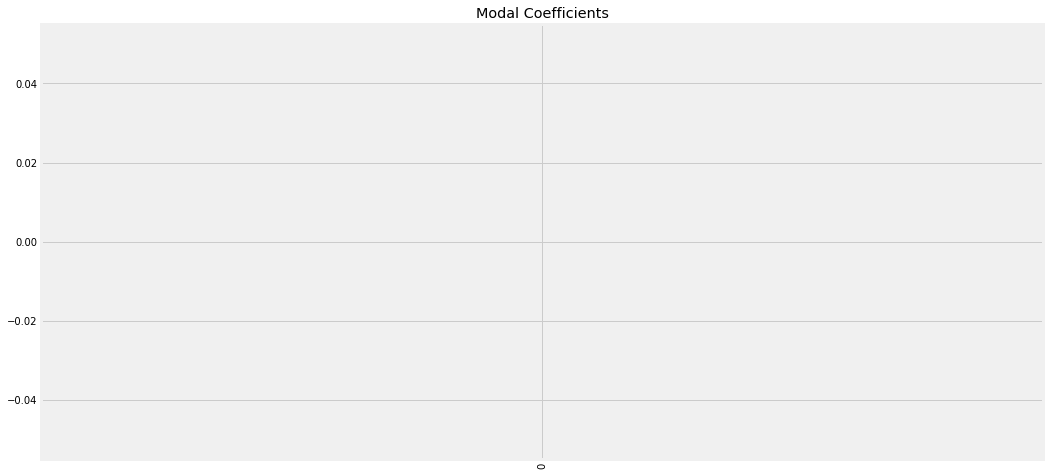

In [139]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))


In [141]:
# LASSO MODEL

lasso1 = Lasso(alpha=.1, normalize=False)
lasso1.fit(x_train,y_train)

y_train_lasso1 = lasso1.predict(x_train)
y_pred_lasso1 = lasso1.predict(x_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

Training Error: 0.544641115810163
Testing Error: 0.67104920460187


823.2971022432714